In [102]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras_cv

In [9]:
import gdown 

url = "https://drive.google.com/uc?id=1L4sSB1U1aiDX3XuSftHwujYjhFjIEfHr&authuser=0&export=download&confirm=t"
output = "dataset.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1L4sSB1U1aiDX3XuSftHwujYjhFjIEfHr&authuser=0&export=download&confirm=t
To: /content/dataset.zip
100%|██████████| 206M/206M [00:01<00:00, 158MB/s]


'dataset.zip'

In [10]:
!unzip -q dataset.zip

In [4]:
directory = '/content/content/processed_data'
directory = 'content/processed_data'


Let's create training and test datsets using a keras built-in funciton. With this method not all images will be stored in memory, and they will be scaled down to (256, 256) and converted to grayscale when a batch is needed

In [158]:
training = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=10,
    image_size=(224, 224),
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)
test = keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=10,
    image_size=(224, 224),
    shuffle=True,
    seed=1024,
    validation_split=0.1,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2235 files belonging to 2 classes.
Using 2012 files for training.
Found 2235 files belonging to 2 classes.
Using 223 files for validation.


In [80]:
training

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [166]:
rand_aug = keras_cv.layers.RandAugment(
    [0, 255],
    augmentations_per_image=3,
    magnitude=0.5,
    magnitude_stddev=0.15,
    rate=0.9090909090909091,
    geometric=False,
    seed=None)

model = keras.models.Sequential()
model.add(rand_aug)
model.add(keras.layers.Rescaling(1./255))
keras.layers.BatchNormalization()
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
keras.layers.BatchNormalization()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
keras.layers.BatchNormalization()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
keras.layers.BatchNormalization()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
keras.layers.BatchNormalization()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
keras.layers.BatchNormalization()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2, input_shape=(64, )))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.2, input_shape=(16, )))
model.add(keras.layers.Dense(1))


In [167]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(training, epochs=50, 
                    validation_data=test)

Epoch 1/50
202/202 [==============================] - 86s 417ms/step - loss: 0.6685 - accuracy: 0.6019 - val_loss: 0.5798 - val_accuracy: 0.6323
Epoch 2/50
202/202 [==============================] - 92s 455ms/step - loss: 0.6642 - accuracy: 0.6019 - val_loss: 0.5692 - val_accuracy: 0.6323
Epoch 3/50
202/202 [==============================] - 89s 441ms/step - loss: 0.6367 - accuracy: 0.6014 - val_loss: 0.5695 - val_accuracy: 0.6323
Epoch 4/50
202/202 [==============================] - 95s 470ms/step - loss: 0.6172 - accuracy: 0.6024 - val_loss: 0.5900 - val_accuracy: 0.6323
Epoch 5/50
202/202 [==============================] - 91s 452ms/step - loss: 0.6164 - accuracy: 0.6312 - val_loss: 0.5119 - val_accuracy: 0.7040
Epoch 6/50
202/202 [==============================] - 93s 462ms/step - loss: 0.5978 - accuracy: 0.6605 - val_loss: 0.5176 - val_accuracy: 0.6861
Epoch 7/50
202/202 [==============================] - 94s 467ms/step - loss: 0.5806 - accuracy: 0.6849 - val_loss: 0.4783 - val_ac

23/23 - 3s - loss: 0.4830 - accuracy: 0.8027 - 3s/epoch - 113ms/step


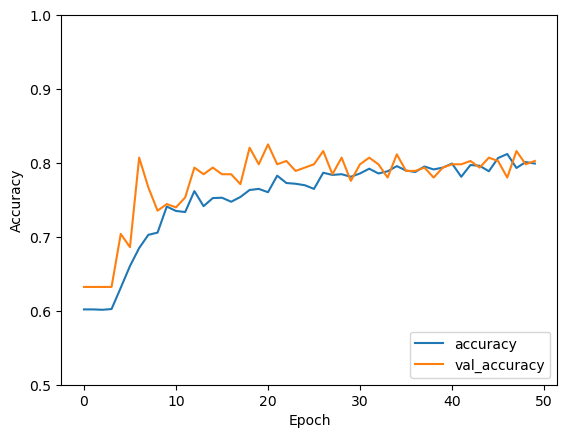

In [168]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test, verbose=2)

In [169]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rand_augment_25 (RandAugmen  (None, 224, 224, 3)      0         
 t)                                                              
                                                                 
 rescaling_36 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 conv2d_208 (Conv2D)         (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 111, 111, 128)    0         
 g2D)                                                            
                                                                 
 conv2d_209 (Conv2D)         (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 54, 54, 64)     

In [172]:
# Save model to run inference on the Jetson Nano

model.save('cnn_model4.hdf5')